In [54]:
# Main imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split,StratifiedKFold,KFold,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,RobustScaler



In [55]:
df = pd.read_csv("weatherAUS.csv")


In [56]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [58]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [59]:
df.isnull().mean()

Date             0.000000
Location         0.000000
MinTemp          0.010209
MaxTemp          0.008669
Rainfall         0.022419
Evaporation      0.431665
Sunshine         0.480098
WindGustDir      0.070989
WindGustSpeed    0.070555
WindDir9am       0.072639
WindDir3pm       0.029066
WindSpeed9am     0.012148
WindSpeed3pm     0.021050
Humidity9am      0.018246
Humidity3pm      0.030984
Pressure9am      0.103568
Pressure3pm      0.103314
Cloud9am         0.384216
Cloud3pm         0.408071
Temp9am          0.012148
Temp3pm          0.024811
RainToday        0.022419
RainTomorrow     0.022460
dtype: float64

Evaporation, Sunshine, Cloud9am, Cloud3pm have many N.A. values more than 40%       

<AxesSubplot:>

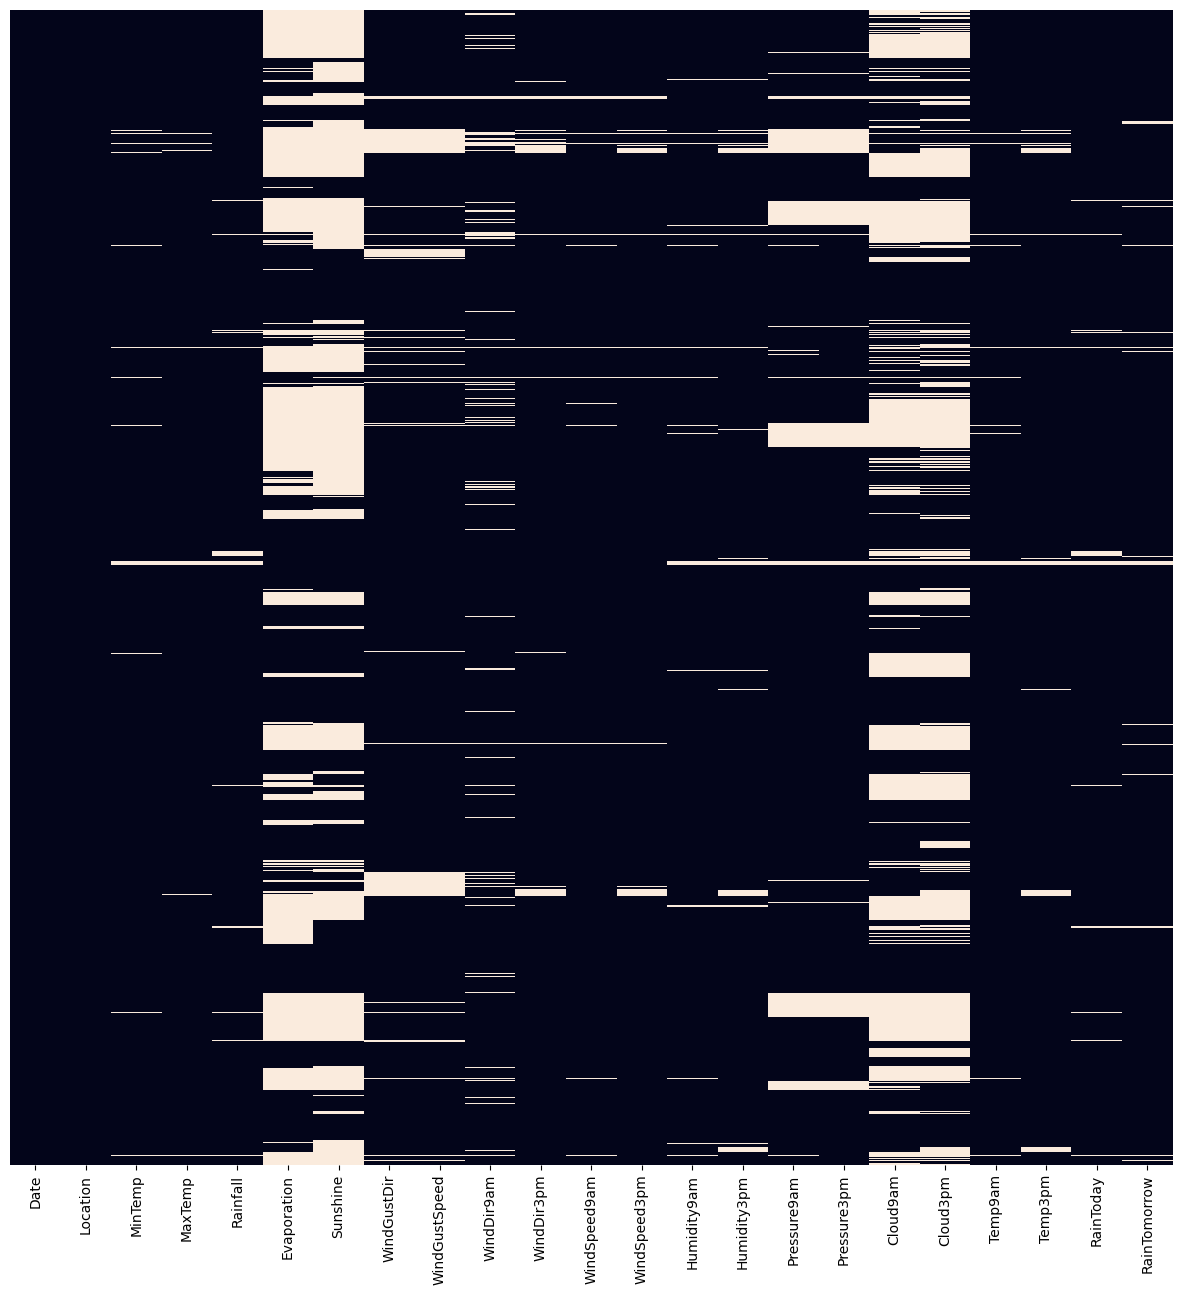

In [60]:
plt.figure(figsize=(15,15))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)


Filling Numerical columns with Median and Categorial columns with Mode

In [61]:
numerical_features = [x for x in df.columns if df[x].dtype == float]
categorical_features = [x for x in df.columns if df[x].dtype != float]
print(numerical_features)
print(categorical_features)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [62]:
for col in numerical_features:
    df[col] = df[col].fillna(df[col].median())
for col in categorical_features:
    df[col] = df[col].fillna(df[col].mode()[0])

One HotEncoding Categorical Data

In [63]:
for col in categorical_features:
    df[col] = pd.Categorical(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Date           145460 non-null  category
 1   Location       145460 non-null  category
 2   MinTemp        145460 non-null  float64 
 3   MaxTemp        145460 non-null  float64 
 4   Rainfall       145460 non-null  float64 
 5   Evaporation    145460 non-null  float64 
 6   Sunshine       145460 non-null  float64 
 7   WindGustDir    145460 non-null  category
 8   WindGustSpeed  145460 non-null  float64 
 9   WindDir9am     145460 non-null  category
 10  WindDir3pm     145460 non-null  category
 11  WindSpeed9am   145460 non-null  float64 
 12  WindSpeed3pm   145460 non-null  float64 
 13  Humidity9am    145460 non-null  float64 
 14  Humidity3pm    145460 non-null  float64 
 15  Pressure9am    145460 non-null  float64 
 16  Pressure3pm    145460 non-null  float64 
 17  Cloud9am  

In [64]:
cols = categorical_features 
df[cols] = df[cols].apply(lambda x: x.cat.codes)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,22.9,0.6,4.8,8.4,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,397,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,398,2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,399,2,9.2,28.0,0.0,4.8,8.4,4,24.0,9,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,400,2,17.5,32.3,1.0,4.8,8.4,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


Exploratory Data Analysis : Categorial


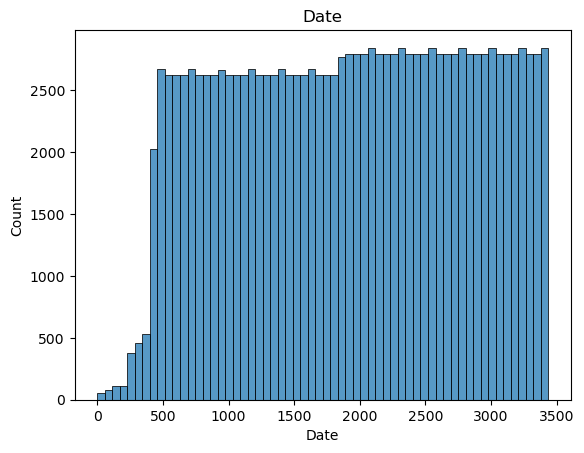

<Figure size 1000x1000 with 0 Axes>

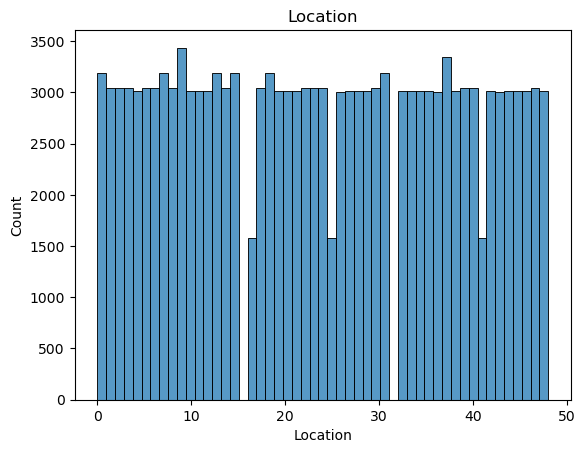

<Figure size 1000x1000 with 0 Axes>

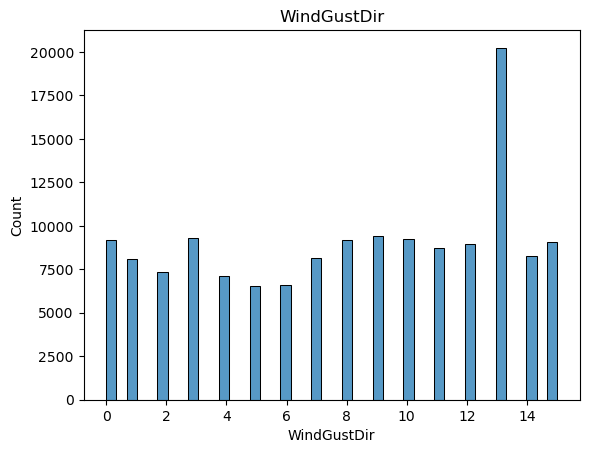

<Figure size 1000x1000 with 0 Axes>

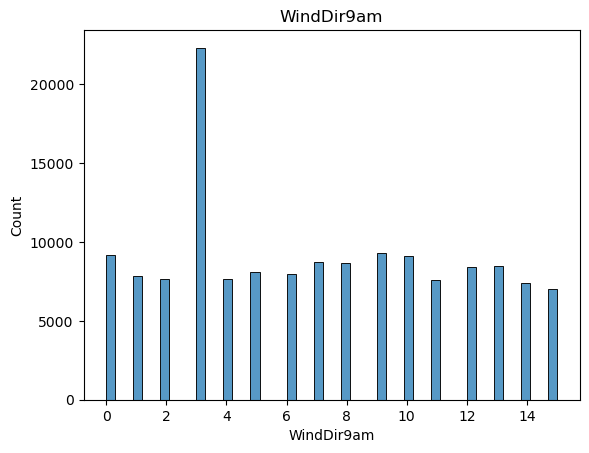

<Figure size 1000x1000 with 0 Axes>

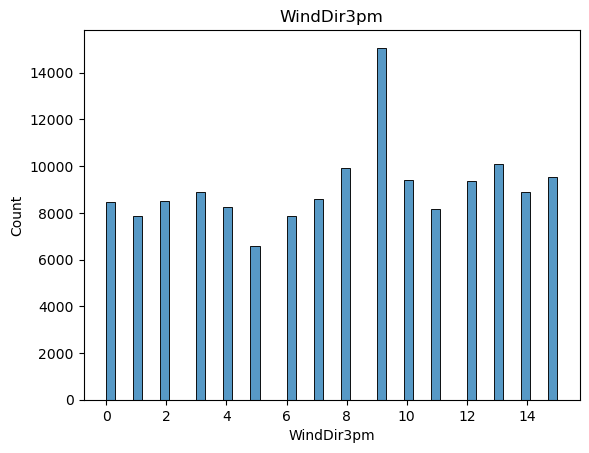

<Figure size 1000x1000 with 0 Axes>

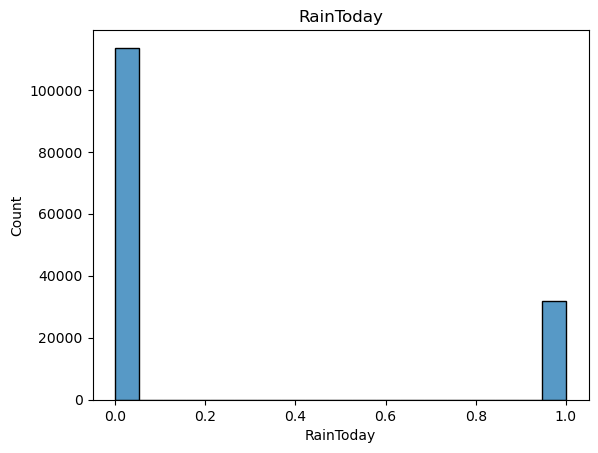

<Figure size 1000x1000 with 0 Axes>

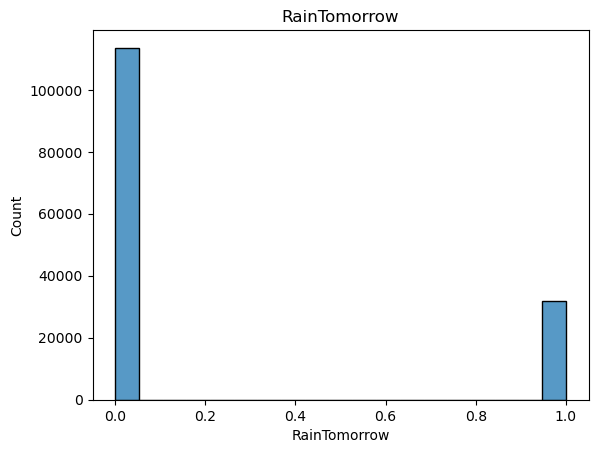

<Figure size 1000x1000 with 0 Axes>

In [65]:
for feature in categorical_features:
    data=df.copy()
    sns.histplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(10,10))
    plt.show()

Exploratory Data Analysis : Numerical

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\si

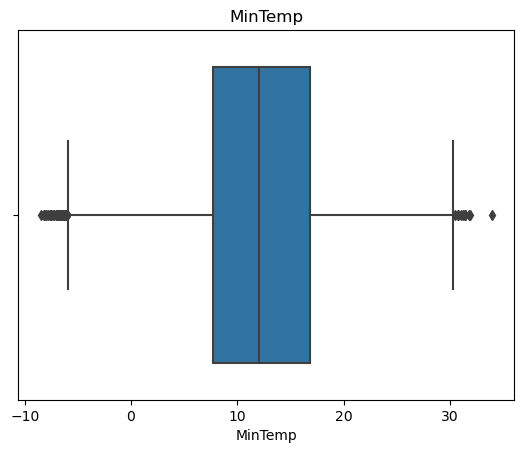

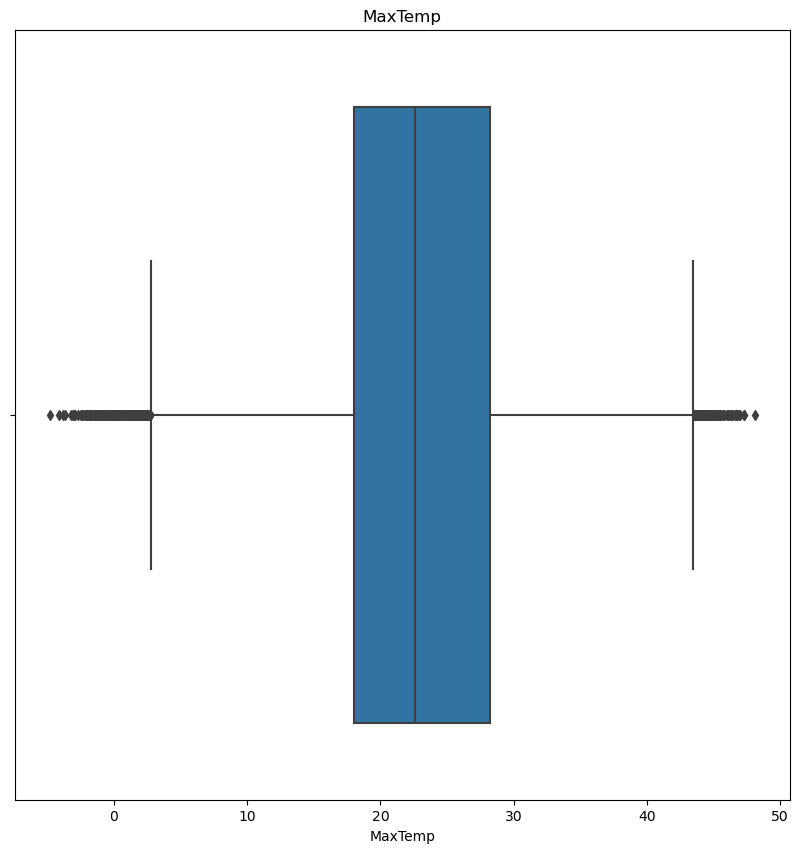

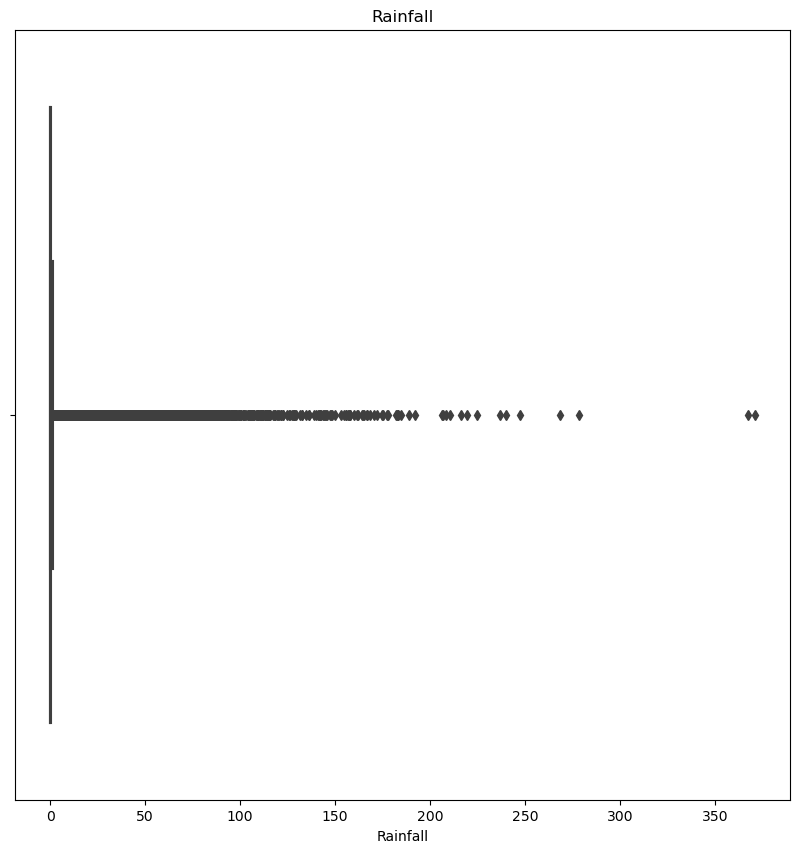

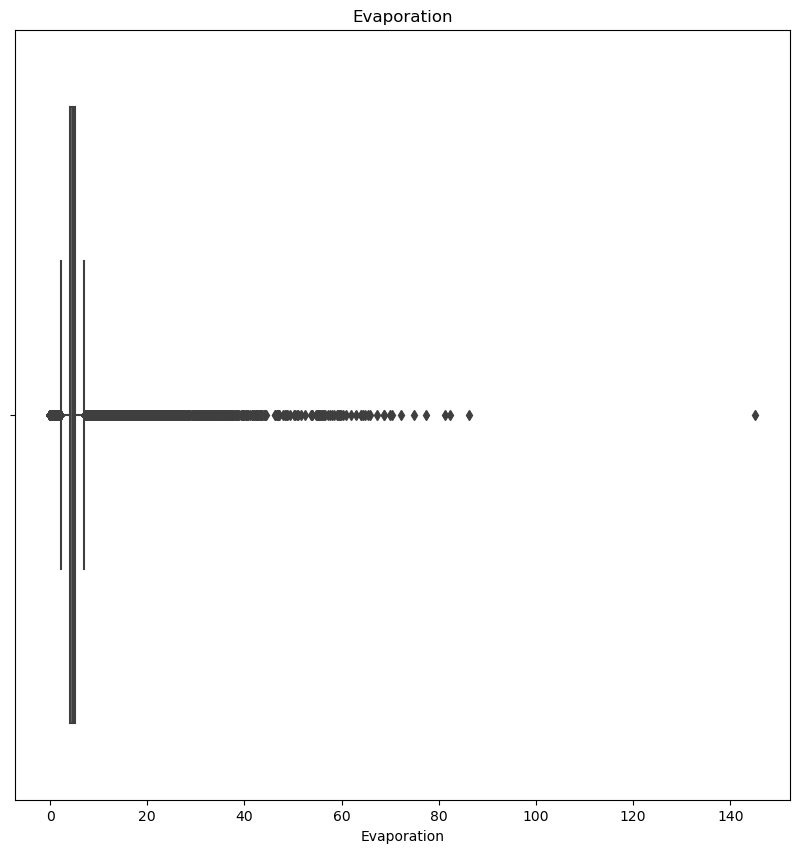

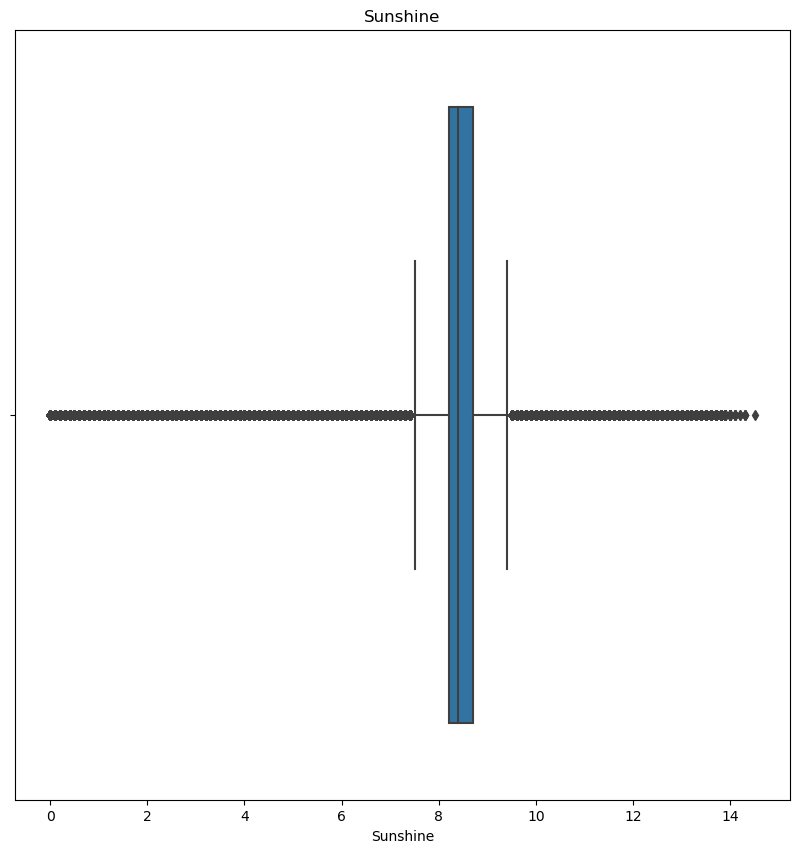

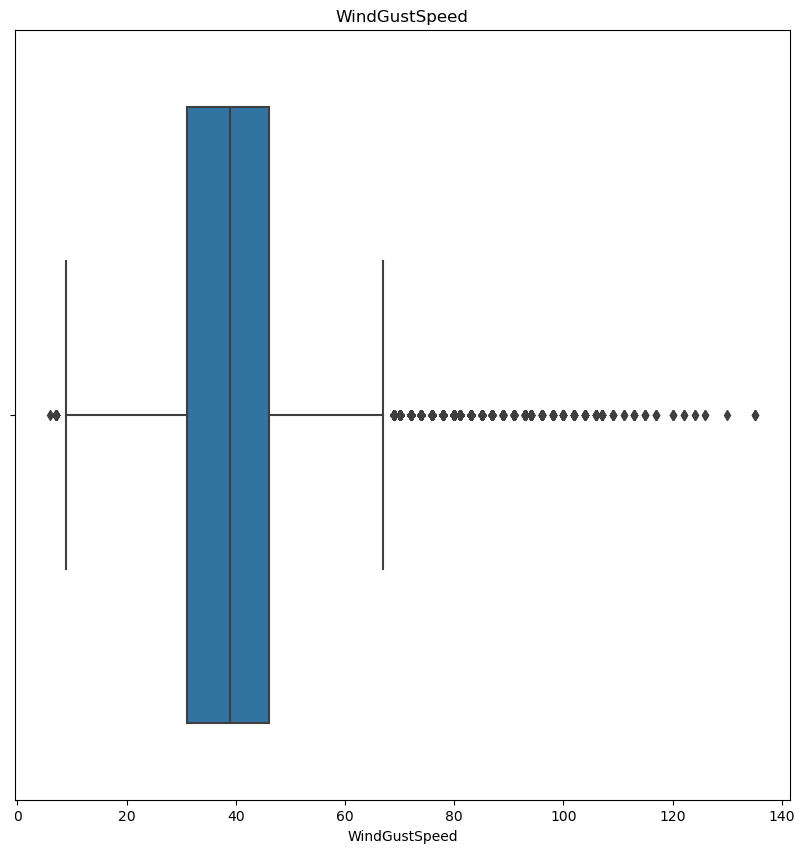

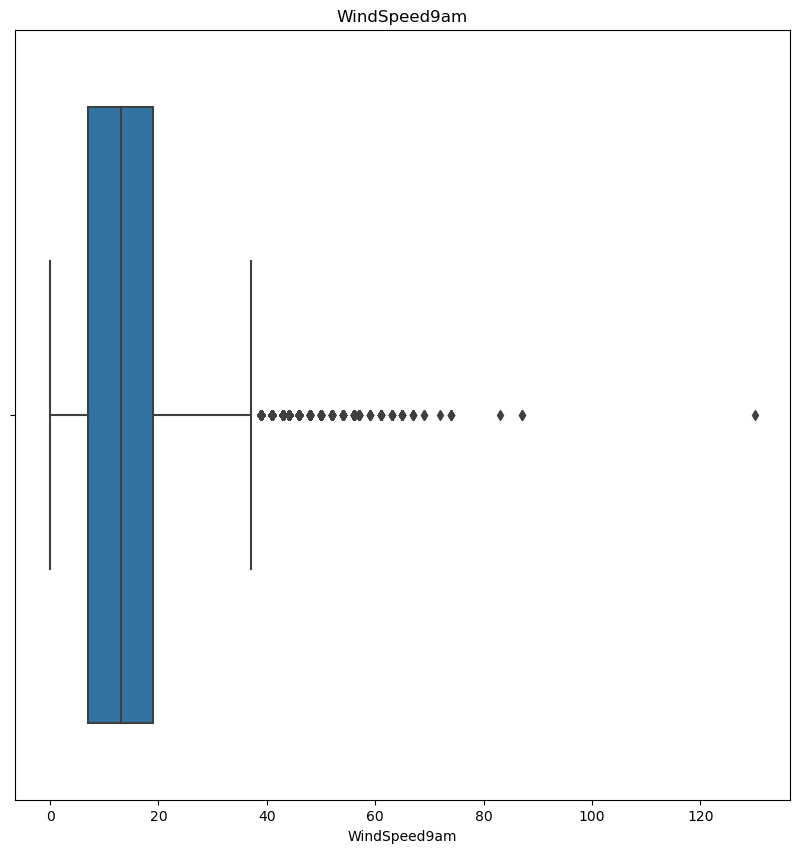

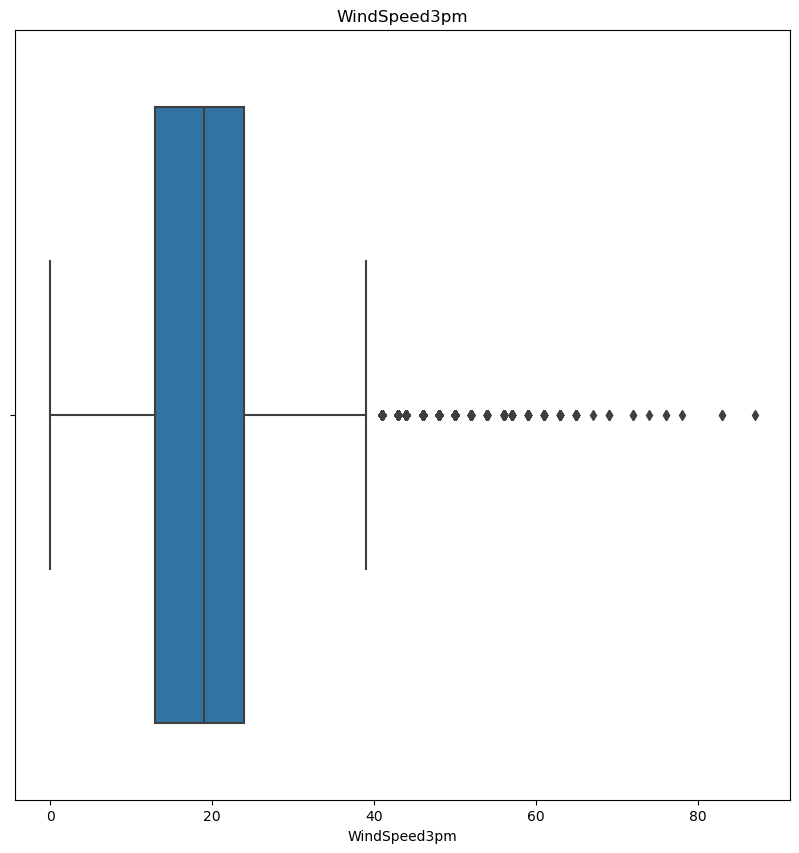

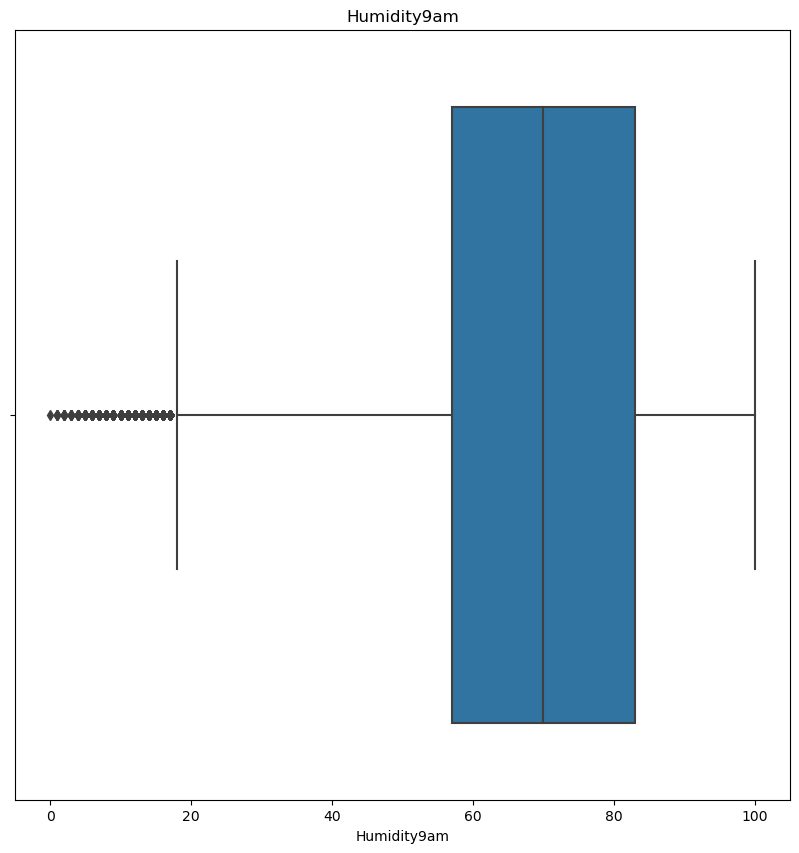

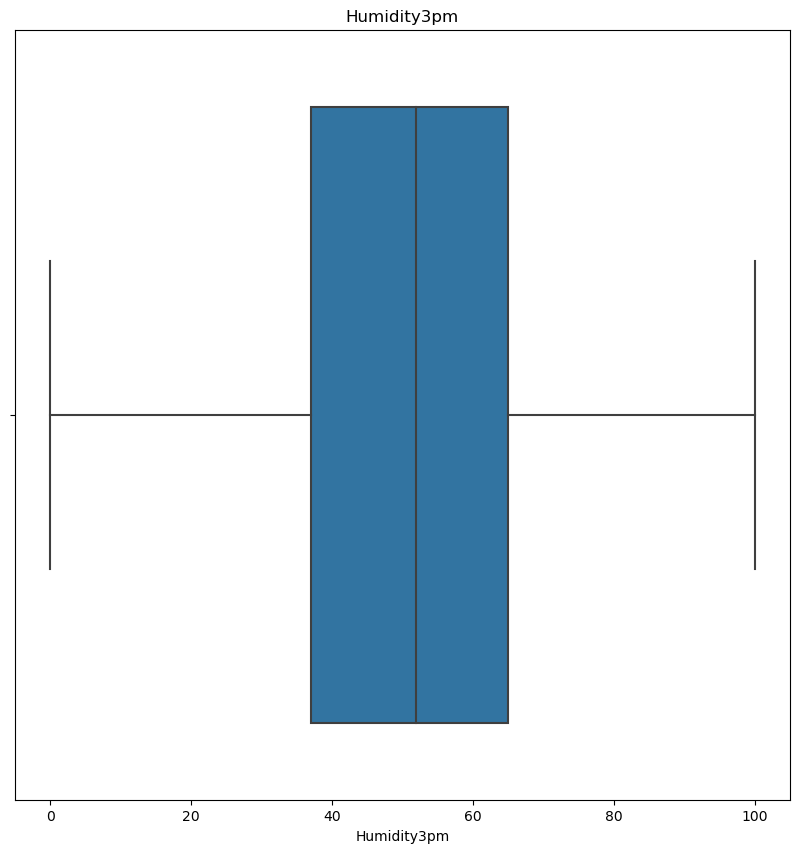

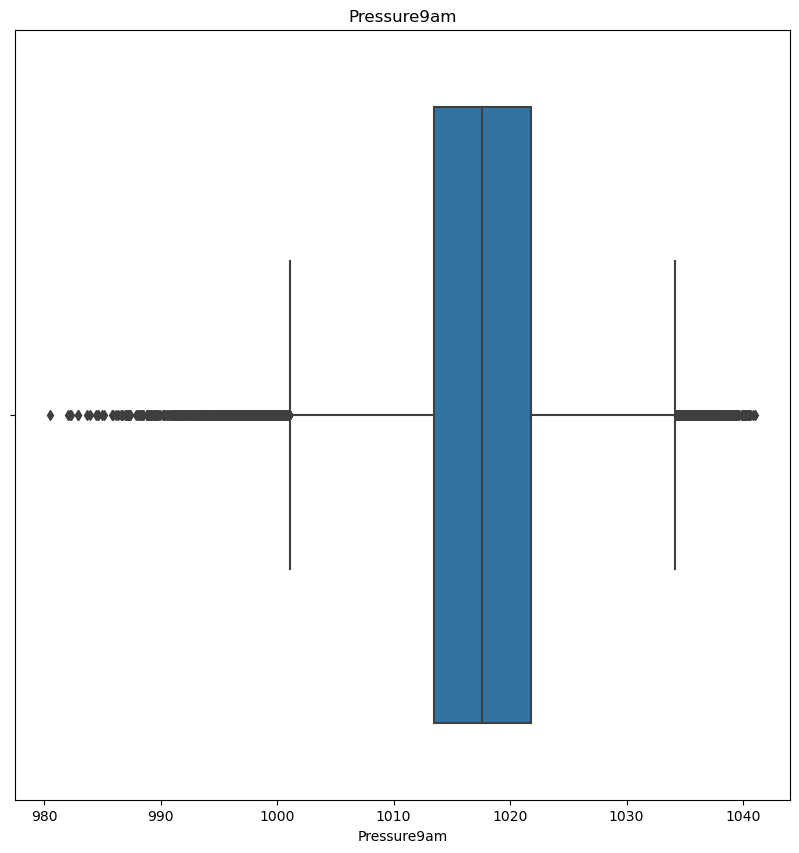

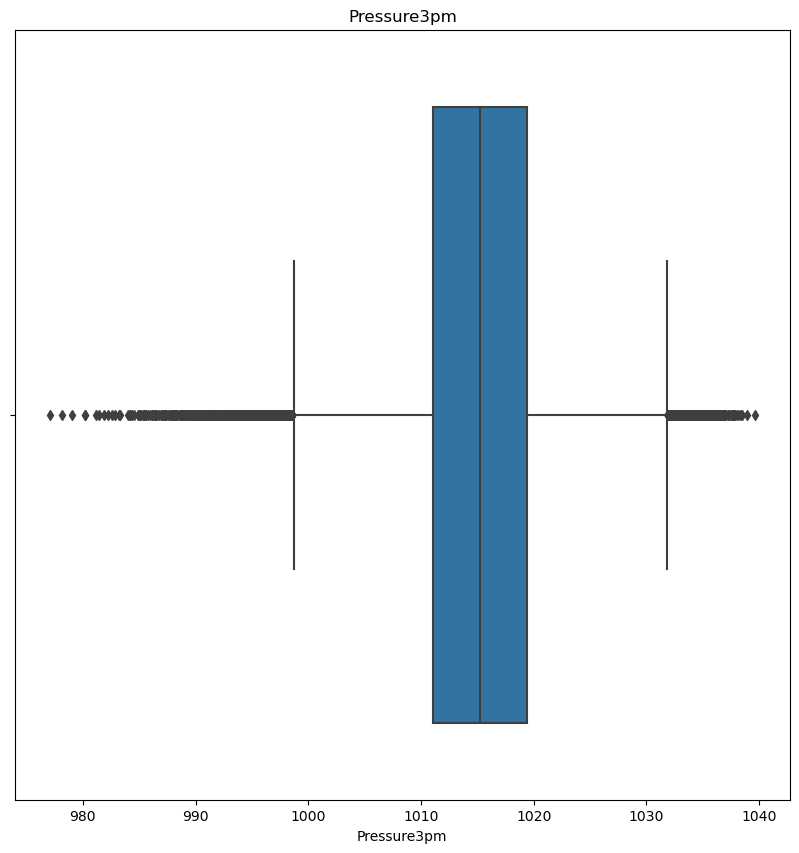

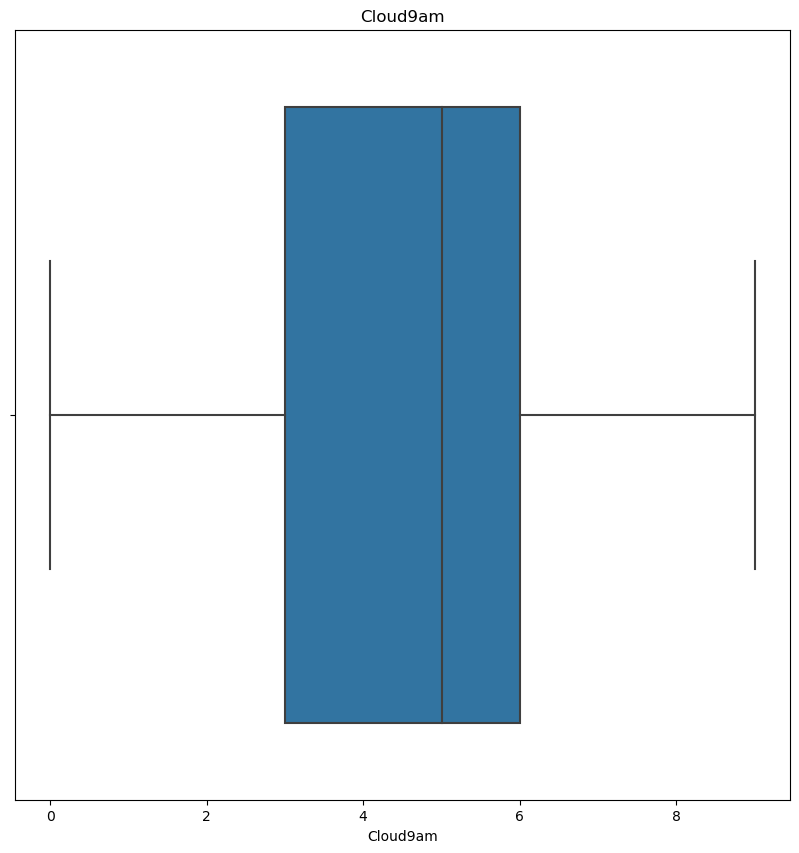

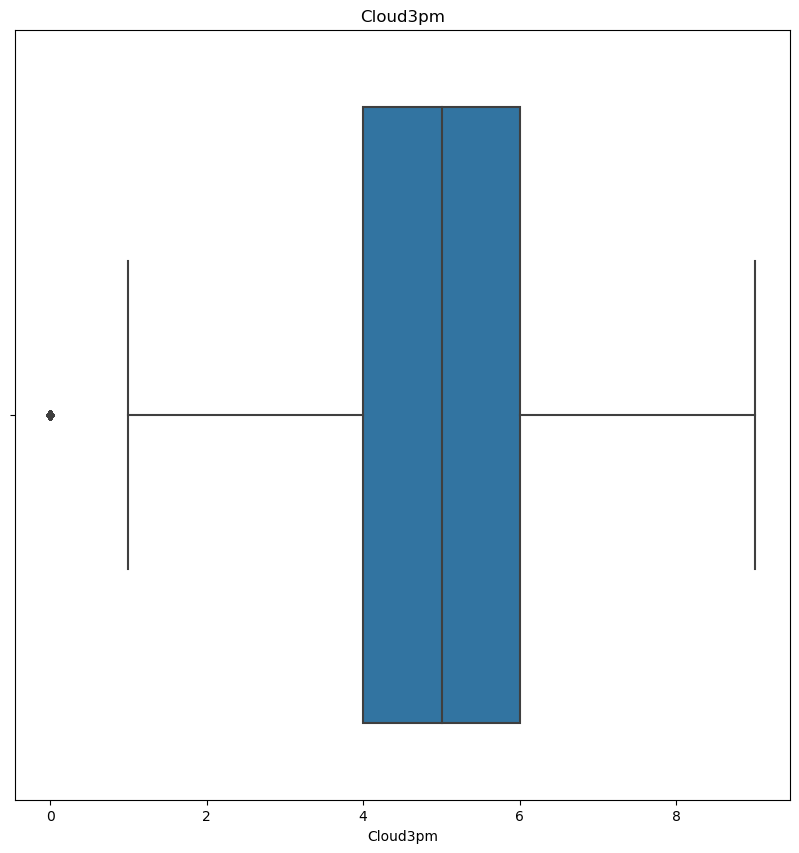

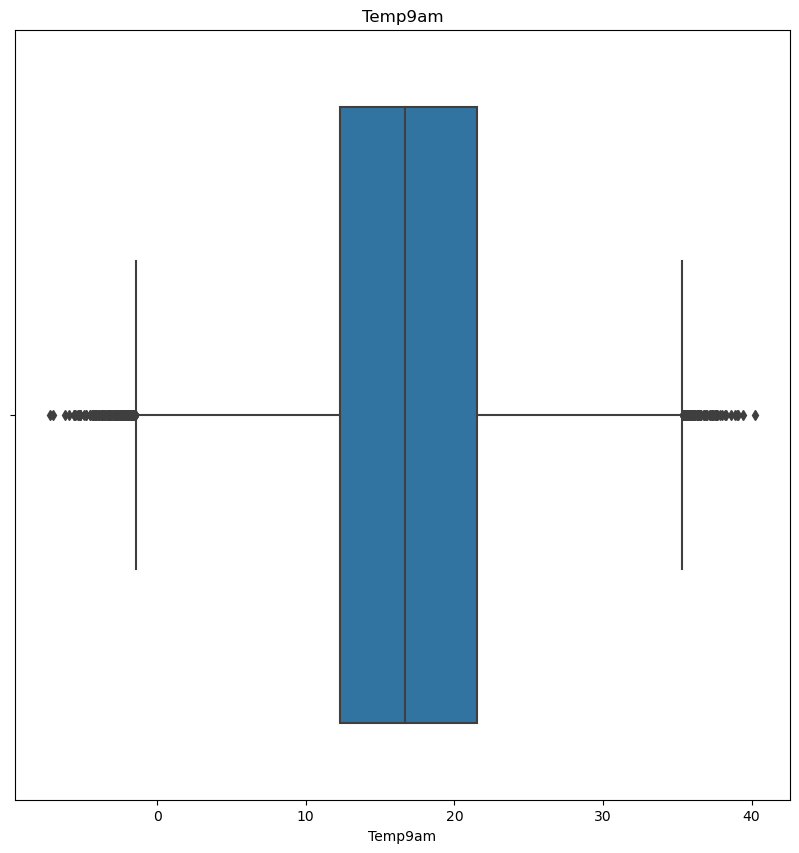

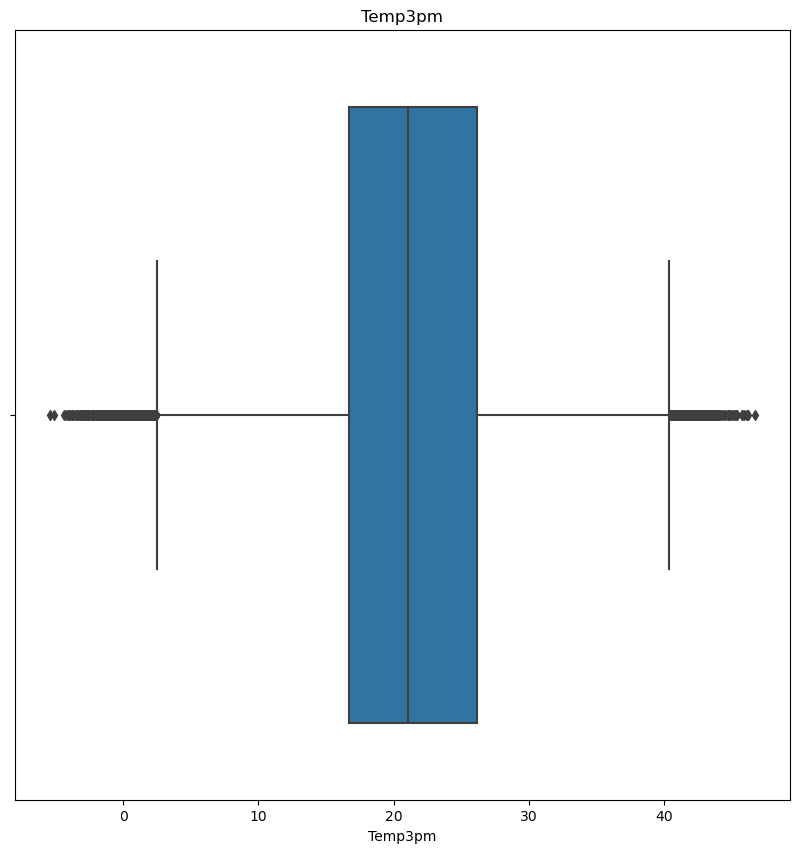

<Figure size 1000x1000 with 0 Axes>

In [66]:
for feature in numerical_features:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(10,10))

<AxesSubplot:xlabel='RainToday', ylabel='count'>

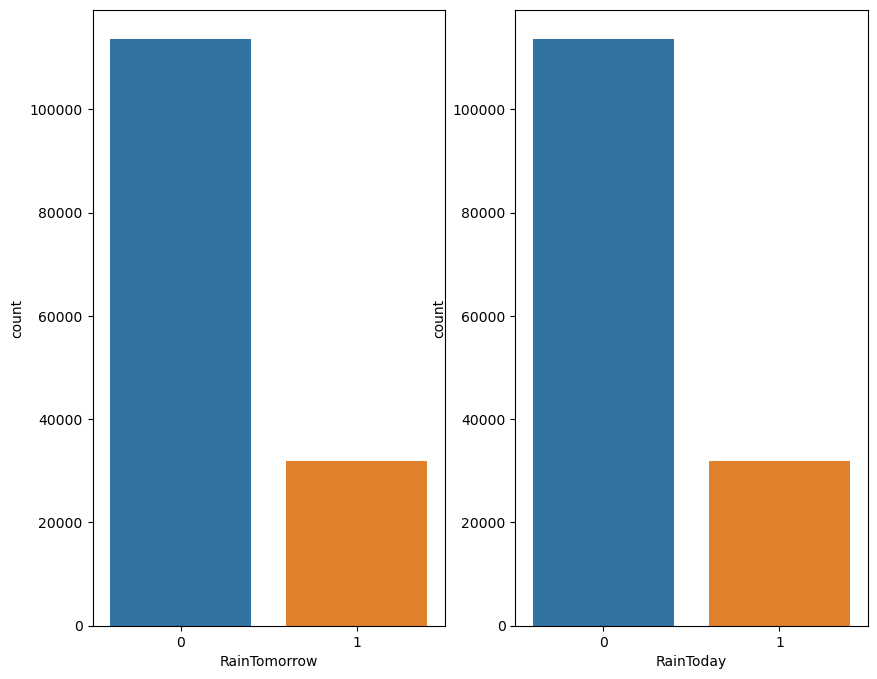

In [67]:
fig,ax = plt.subplots(1,2, figsize = (10,8))

sns.countplot(data = df,x='RainTomorrow',ax=ax[0])
sns.countplot(data = df,x='RainToday',ax=ax[1])

Taking INFO from Date

In [68]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%dT", errors = "coerce")
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day
df = df.drop('Date',axis=1)

In [69]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2,13.4,22.9,0.6,4.8,8.4,13,44.0,13,14,...,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0,1,1
1,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,15,...,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0,1,1
2,2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,15,...,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0,1,1
3,2,9.2,28.0,0.0,4.8,8.4,4,24.0,9,0,...,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0,1,1
4,2,17.5,32.3,1.0,4.8,8.4,13,41.0,1,7,...,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,1,1


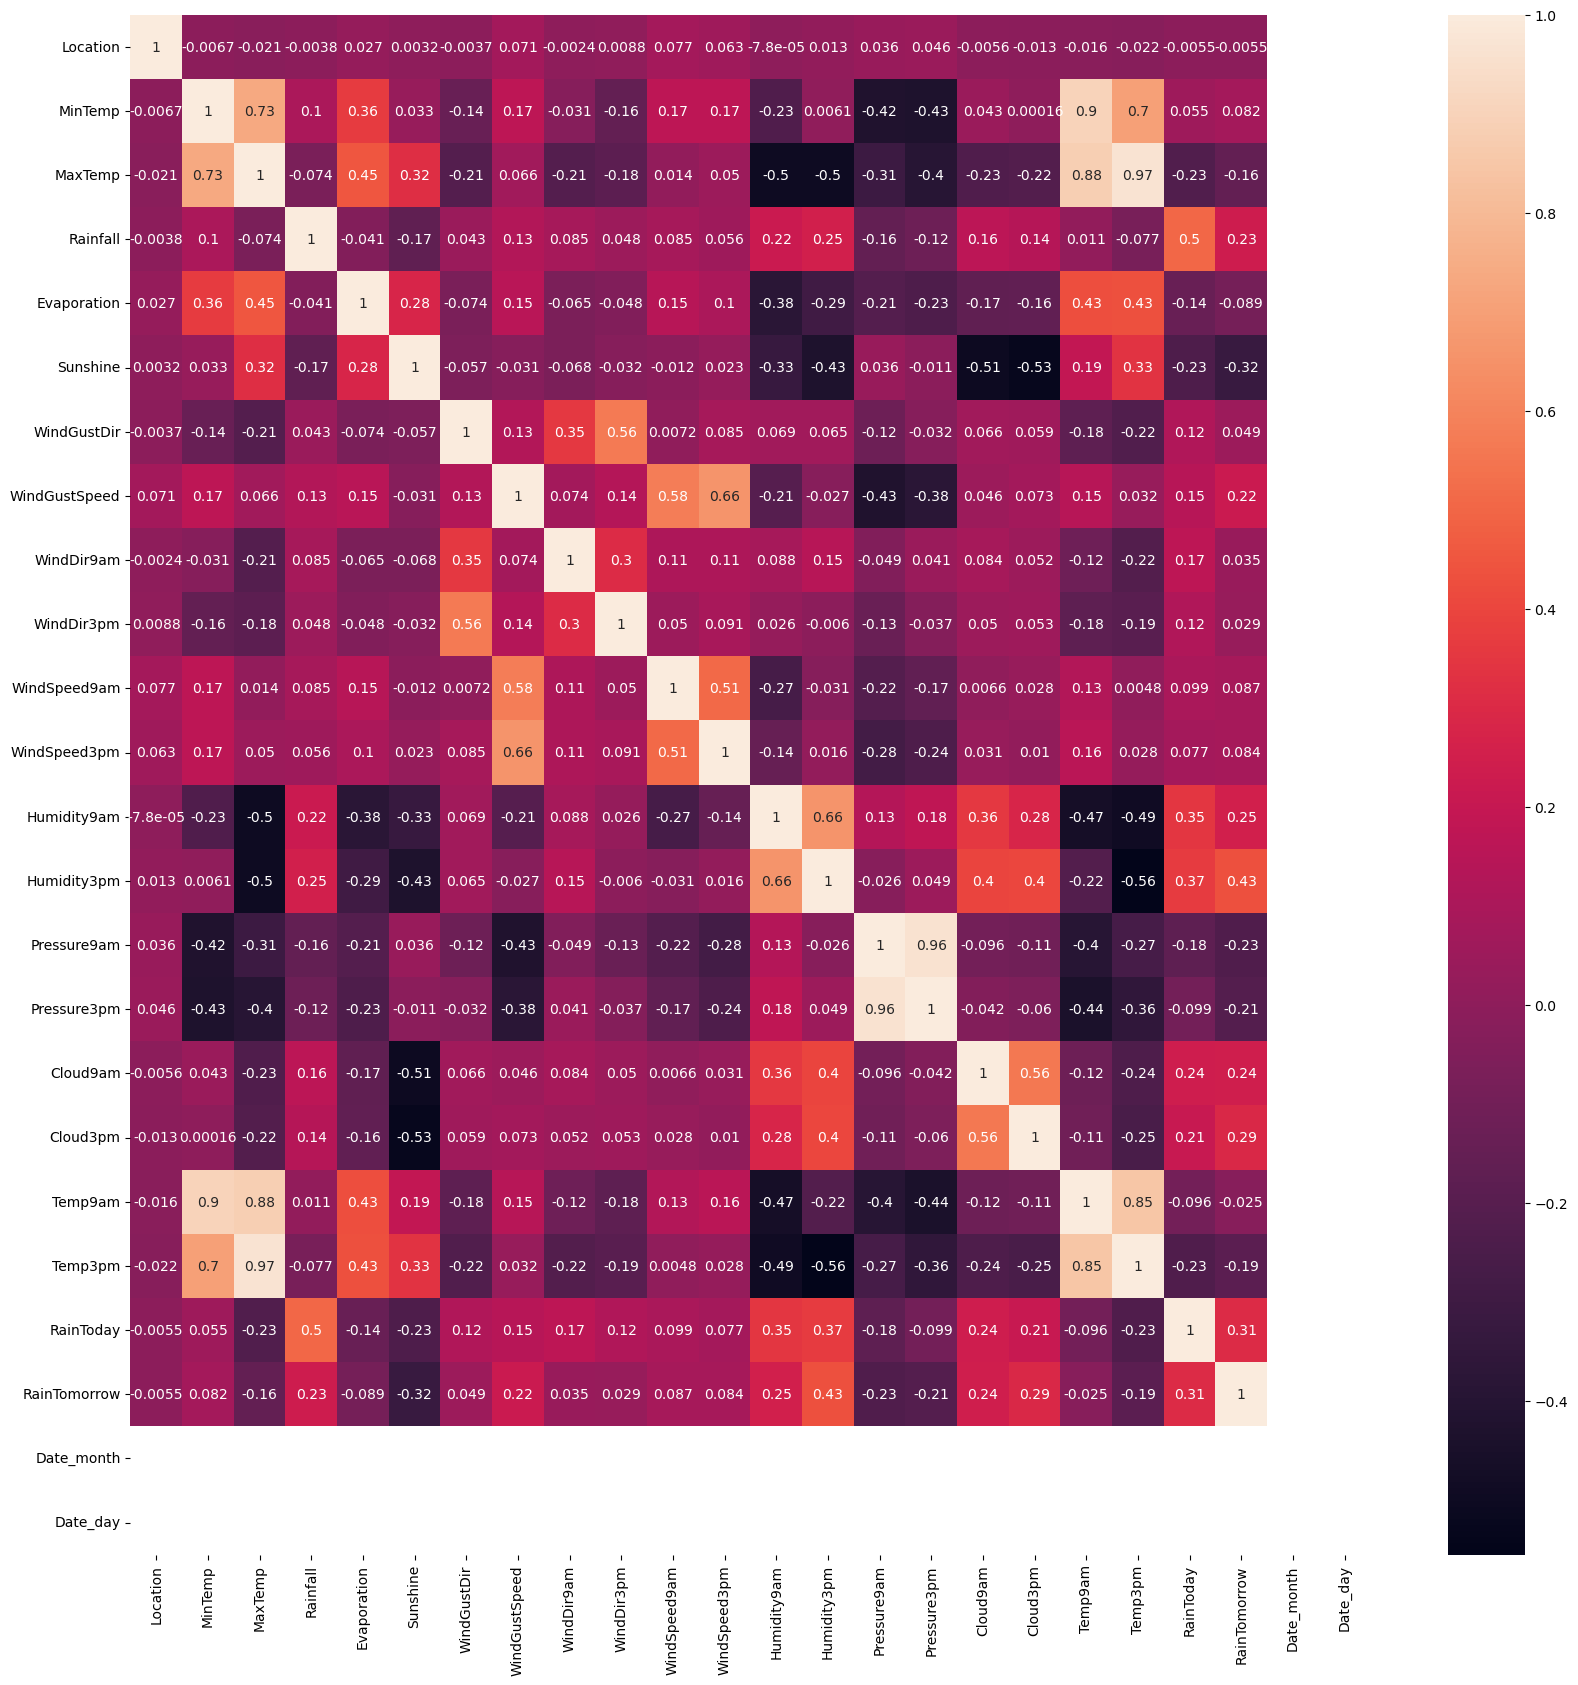

In [70]:
corr = df.corr()
plt.figure(figsize=(20,20))
g=sns.heatmap(corr,annot=True)

In [71]:
df.to_csv("preprocessed.csv", index=False)